<a href="https://colab.research.google.com/github/Baldros/Centrale-Nantes-Project/blob/main/CentraleNantesEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentation:

    Bonjour, ça va? 🙂
    
    The objective of this activity is to prepare students, toi, to deal
    with the data analysis process. Here, we will address aspects related
    to Exploratory Data Analysis (EDA), going through processes inherent
    to the processing and visualization of information.

    For the activity, a set of meteorological data extracted from Météo-France
    was chosen to serve as a dataset and some libraries related to data
    manipulation and visualization are used in this activity.

https://meteofrance.com/

## Data overview
### Metadata parameters
* **number_sta :** ground station number

* **lat :** latitude into decimal degrees

* **lon :** longitude into decimal degrees

* **height_sta :** station height into meters

* The **date** parameter is a datetime object with the format **'YYYY-MM-DD HH:mm:ss'**.

### Meteorological parameters
* **dd :** wind direction in degrees

* **ff :** wind speed in m.s-1

* **precip :** precipitation during the reporting period in kg.m2

* **hu :** humidity in %

* **td :** dew point temperature** in Kelvin

* **t :** temperature in Kelvin

* **psl :** pressure reduced to sea level in Pa

  ** : temperature for which it is needed to refresh an air volume at constant pressure and humidity to become it saturated (i.e. condensation temperature)

# Request the data:

    The dataset used here was extracted from the github of the Météo-France.
    The organization was established by decree in June 1993 and is a department
    of the French Ministry of Transport. Méteo-France is based in Paris but
    many of its operations have been decentralized to Toulouse.

https://github.com/meteofrance

    To build our analysis, the first step here will be to donwload the
    files contained in the Météo-France GitHub into our working environment.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cleaning the data:

    The process of cleaning the data, known as data pretreatment, is a
    very important step that, for the sake of your analysis, should not
    be neglected. Real datasets have problems that need to be addressed,
    otherwise statistical methods may not work properly, or worse... Not
    give any error and you won't know it's wrong.

**Documentation:**

Pandas: https://pandas.pydata.org/

    Pandas is one of the most well-known libraries in Python for data
    analysis, serving as the primary library for handling tabular data
    manipulation. The pandas Project (The Project) is an open source
    software project affiliated with the 501(c)3 NumFOCUS Foundation. The
    goal of The Project is to develop open source software for data ingest,
    data preparation, data analysis, and data visualization for the Python
    programming language.

Matplotlib: https://matplotlib.org/

    Matplotlib is classic and a powerful Python library for creating
    static, interactive, and animated visualizations. It provides a wide
    range of plotting functions to generate high-quality graphs, charts,
    and figures. Matplotlib is highly customizable, allowing users to
    fine-tune almost every aspect of their visualizations. It is widely
    used in the scientific and data analysis communities due to its
    flexibility and extensive documentation. With Matplotlib, users can
    create various types of plots, including line plots, scatter plots,
    bar plots, histograms, heatmaps, and more. It serves as the foundation
    for many other visualization libraries and tools in the Python ecosystem.


    One of the reasons why Python is one of the leading languages in this
    area is its community. This turns into many ready-to-use solutions...
    i.e., libraries.

    Here we will start by introducing some libraries. Pandas, for data
    manipulation, but I would like to introduce you to Polar as well, which
    is another interesting, little-known but efficient data manipulation
    library, feel free to choose the one that suits you best. And for
    visualization, let's start with using the classic matplotlib.

In [ ]:
# Library for data manipulation:
import pandas as pd # https://pandas.pydata.org/

# Library for data visualization:
import matplotlib.pyplot as plt # https://matplotlib.org/

# Method to benchmark
from time import time

In [ ]:
# import the data:
inicio = time()
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')
final = time()
display(df);print(f'Tempo de carregamento: {final-inicio}')

,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
0,14066001,49.330,-0.430,2.0,20160101 00:00,210.0,4.4,0.0,91.0,278.45,279.85,NaN
1,14126001,49.150,0.040,125.0,20160101 00:00,NaN,NaN,0.0,99.0,278.35,278.45,NaN
2,14137001,49.180,-0.460,67.0,20160101 00:00,220.0,0.6,0.0,92.0,276.45,277.65,102360.0
3,14216001,48.930,-0.150,155.0,20160101 00:00,220.0,1.9,0.0,95.0,278.25,278.95,NaN
4,14296001,48.800,-1.030,339.0,20160101 00:00,NaN,NaN,0.0,NaN,NaN,278.35,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,95690001,49.108,1.831,126.0,20180101 00:06,230.0,9.4,0.0,75.0,276.65,280.85,NaN
1496,14066001,49.330,-0.430,2.0,20180101 00:12,240.0,8.1,0.0,85.0,277.05,279.35,NaN
1497,14126001,49.150,0.040,125.0,20180101 00:12,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1498,14137001,49.180,-0.460,67.0,20180101 00:12,270.0,5.3,0.0,87.0,278.05,280.05,100680.0


Tempo de carregamento: 0.3658475875854492


    One of the first things we would like to check in our dataset is
    the integrity of the information. Within this process we could think
    of two stages, looking at the missing values and the data typology.

In [ ]:
# Look the info of the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   number_sta  1500 non-null   int64  
 1   lat         1500 non-null   float64
 2   lon         1500 non-null   float64
 3   height_sta  1500 non-null   float64
 4   date        1500 non-null   object 
 5   dd          869 non-null    float64
 6   ff          871 non-null    float64
 7   precip      1418 non-null   float64
 8   hu          939 non-null    float64
 9   td          939 non-null    float64
 10  t           1335 non-null   float64
 11  psl         306 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 140.8+ KB


    We see that there are two problems in our dataset. We have missing
    values and not all columns have the appropriate data typology.

## Handling with missing values:

**Definition of NaN:**

    More technically, NaN "not a number" is a floating point value
    defined by the IEEE 754 standard, which is widely used to represent
    floating point numbers in computer systems. We can simplify it here
    as a missing value.

**Treating NaN values**

    Treating missing data is a separate science, and we could have an
    entire class on the subject, including deciding whether it's worth
    treating this data. Meteorologists themselves, for example, are
    somewhat hesitant to impute data... However, for the sake of
    exercise, we could consider imputing information given our dataset.


    Create a bar chart to visualize the completeness of the dataset,
    where each bar corresponds to one of the columns.

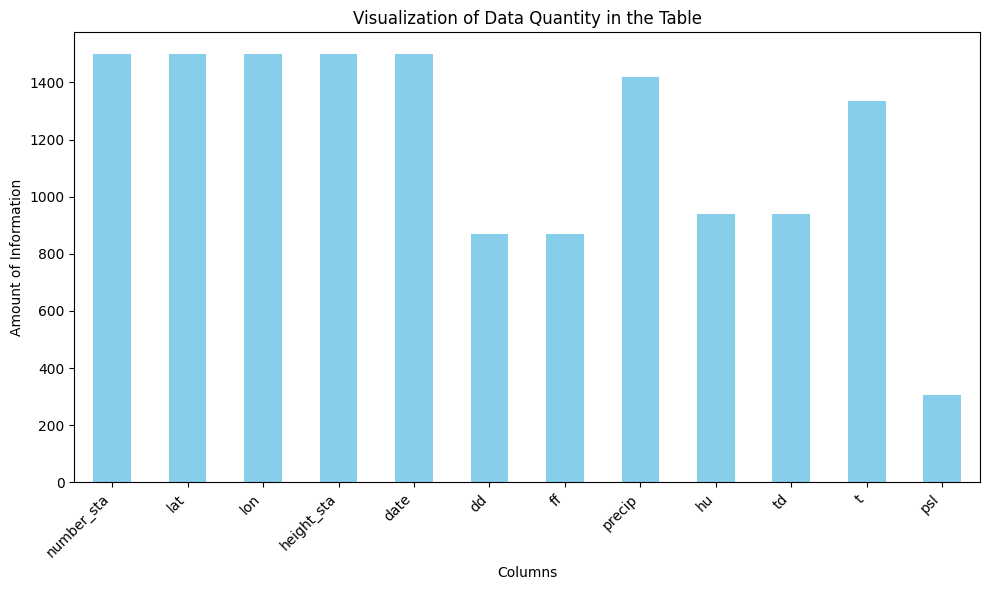

In [ ]:
# Counting the number of non-NaN values in each column
non_nan_count_per_column = df.notna().sum()

# Creating the bar chart
plt.figure(figsize=(10, 6))
non_nan_count_per_column.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Amount of Information')
plt.title('Visualization of Data Quantity in the Table')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Histogram**

    It's interesting that, to define a good data imputation strategy,
    one should build some way to visualize the data distribution. There
    are some graphs that fulfill this role, one of the most well-known
    being the histogram.
    
    Create histograms to visualize the distribution of data and
    think about the best approach to dealing with missing data.

**Attention:**

    1. To facilitate comparison, make plots only for the variables
    that have missing values.

    2. The bins parameter in histogram construction determines the size
    of the grouping, i.e., the quantity of data that will be grouped in
    each class. In other words, in summary, it is interesting to use the
    same bins used here in the histogram with the treated NaN data.

In [ ]:
# Columns with NaN:
columns_with_NaN = [key for key in df.columns if df[key].isna().sum() > 0 ];columns_with_NaN

['dd', 'ff', 'precip', 'hu', 'td', 't', 'psl']

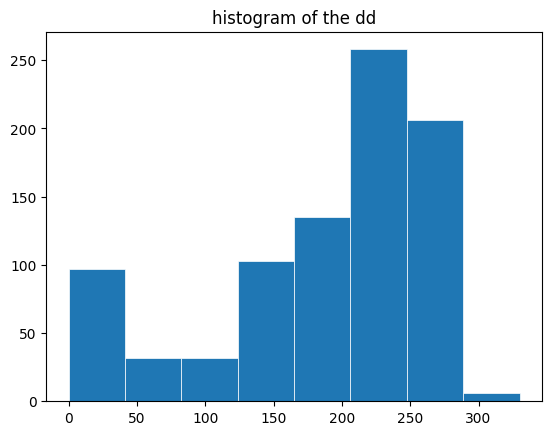

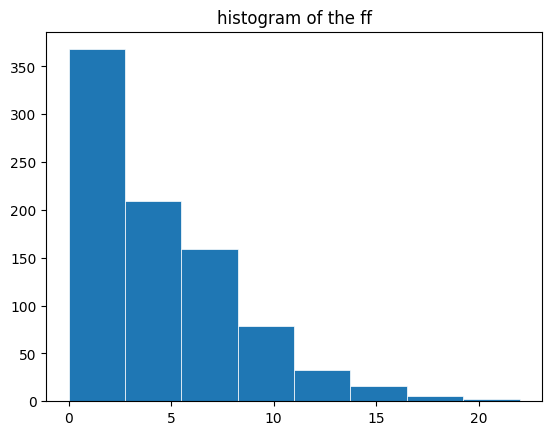

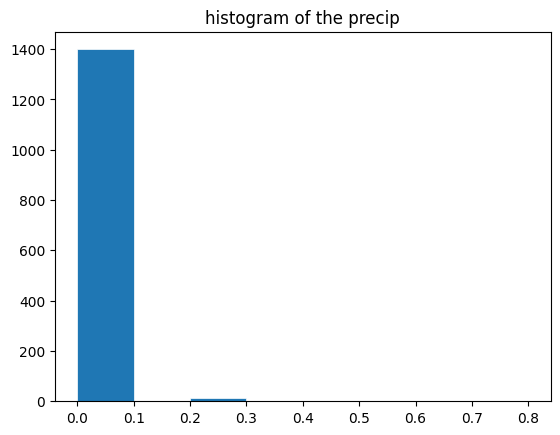

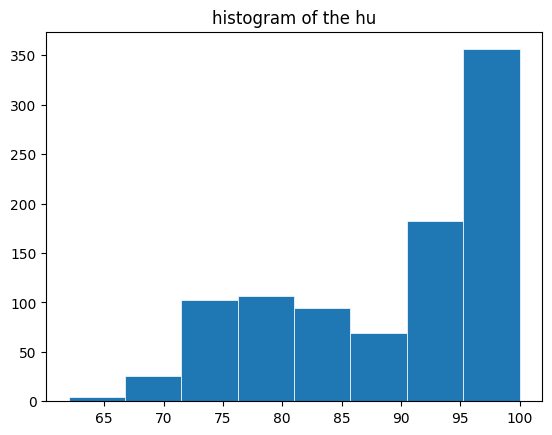

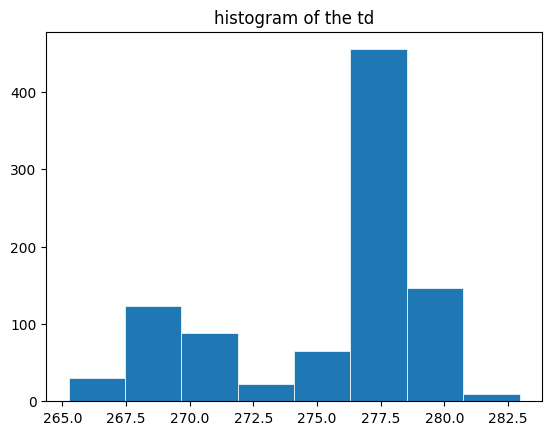

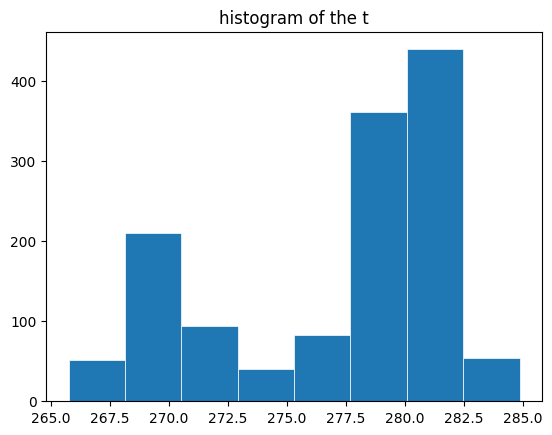

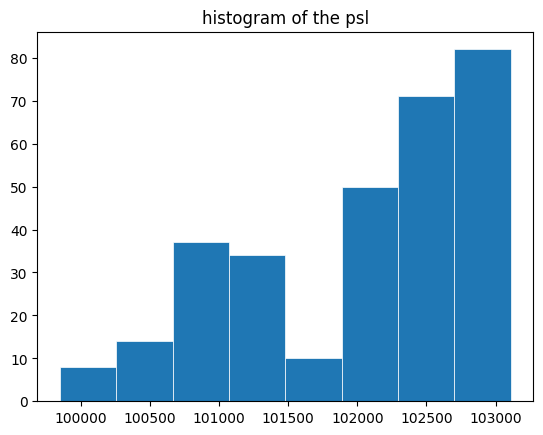

In [ ]:
# Plot histograms:
for key in columns_with_NaN:
  fig, ax = plt.subplots()
  ax.hist(df[key], bins=8, linewidth=0.5, edgecolor="white")
  ax.set_title(f'histogram of the {key}')
  plt.show()

    We could consider excluding rows, excluding entire columns under
    certain conditions. Or we could consider imputing data. For the
    sake of exercise, a reasonable approach to impute data is to use
    the intuitive notion that population quantities should be estimated
    by sample analogs so that we can use the method of moments. Thus,
    for the first moment, we would have the sample mean:

$\mathcal{M}_r = \frac{1}{n}\sum_{i=1}^nX_i^r,\ \text{with}\ r =1$

In [ ]:
# Imputing the data:
for key in df.columns:
    if df[key].isna().any(): # If NaN is found
        media = df[key].mean() # First Moment
        df[key].fillna(media, inplace=True) # Fill

    Let's now visualize the data post the corrections. For this, let's
    use another data visualization tool. Matplotlib is a classic, but
    this area is full of interesting solutions.


**Another solution to visualization:**


Seaborn: https://seaborn.pydata.org/

    Seaborn is a data visualization library in Python that is built on
    top of Matplotlib. It provides a high-level interface for creating
    attractive and informative statistical graphics. We can simplify it
    as "Matplotlib 2.0".

In [ ]:
# Another libraries to visualization
import seaborn as sns

    Create a bar chart to visualize the completeness of the dataset,
    where each bar corresponds to one of the columns using seaborn library.

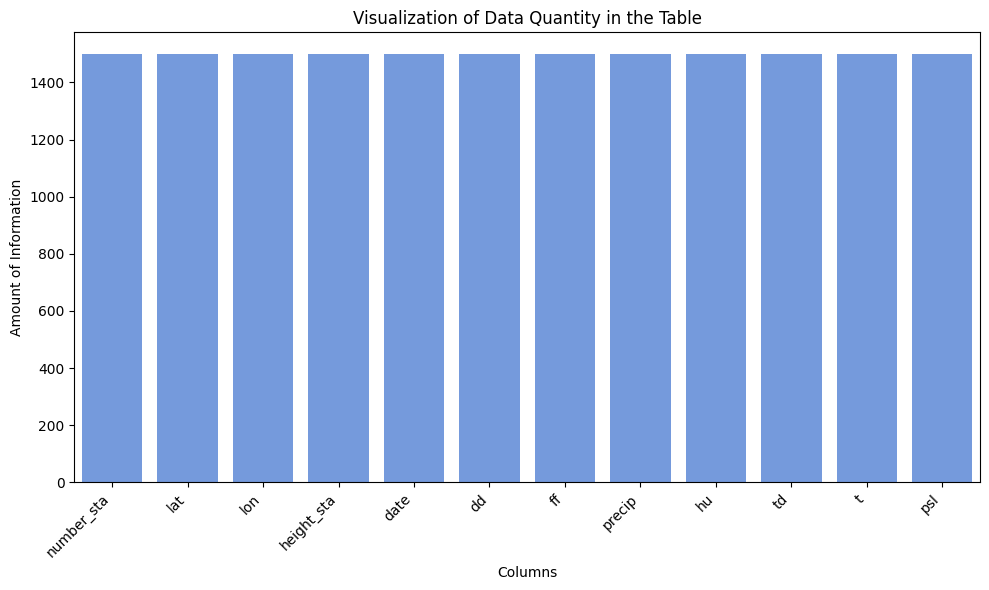

In [ ]:
# Counting the number of non-NaN values in each column
non_nan_count_per_column = df.notna().sum()

# Creating the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=non_nan_count_per_column.index, y=non_nan_count_per_column.values, color='#6495ED')
plt.xlabel('Columns')
plt.ylabel('Amount of Information')
plt.title('Visualization of Data Quantity in the Table')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

    Create histograms to visualize the distribution of data and
    think about the best approach to dealing with missing data.
    Use seaborn, and add density to the histogram of the distribution.

**Remarke**

    Plotting a histogram alongside a density plot offers a comprehensive
    view of data distribution by showcasing both the frequency distribution
    within predefined intervals and the probability density function. This
    combination allows for a deeper understanding of the data's central
    tendency, variability, and patterns, facilitating comparisons between
    different datasets or distributions and aiding in statistical inference
    and interpretation.

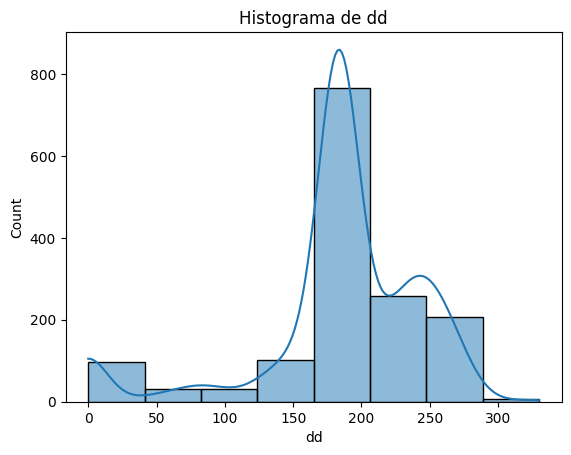

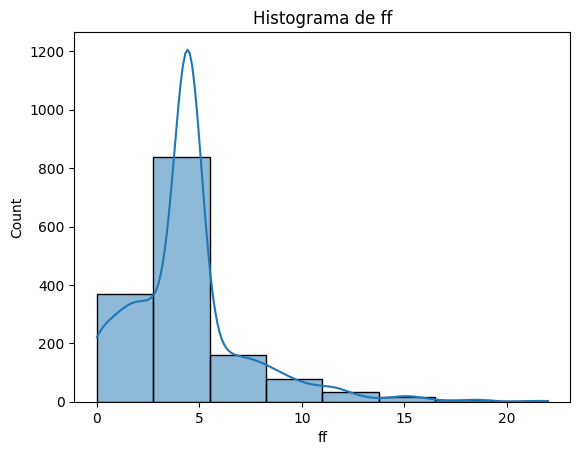

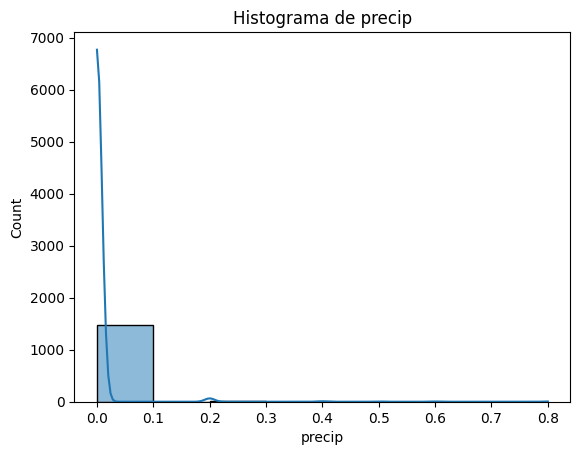

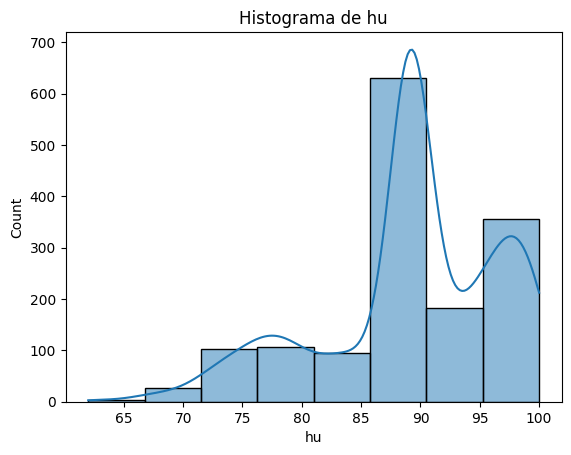

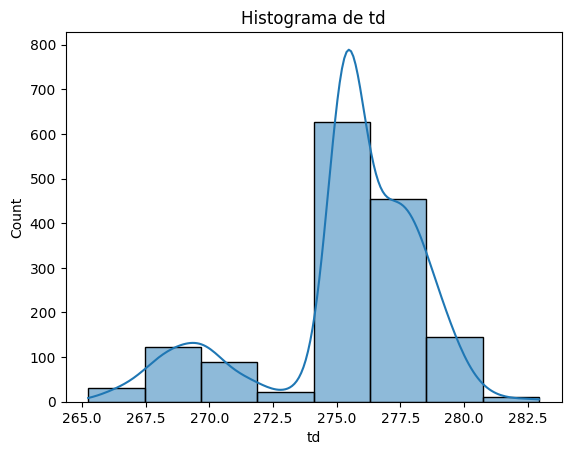

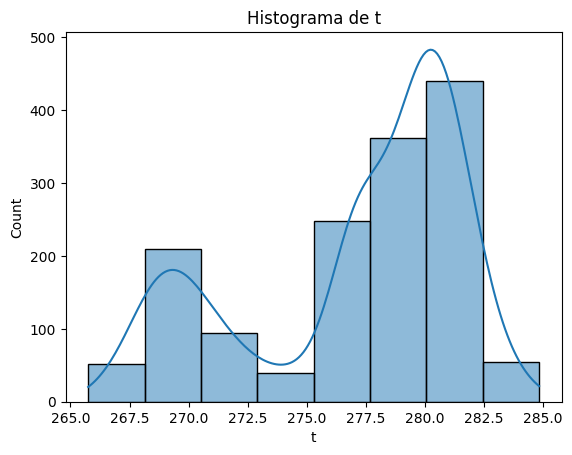

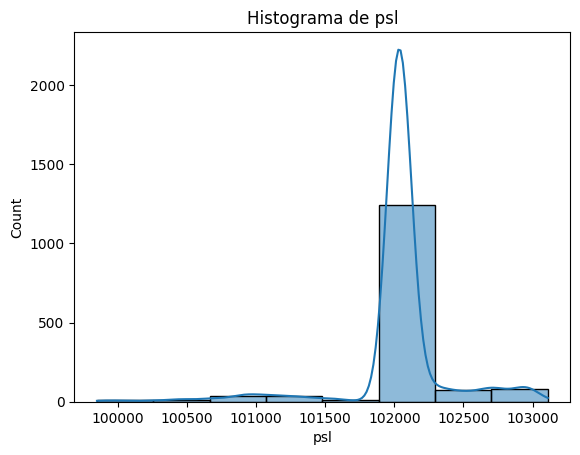

In [ ]:
# Distribution check
for key in columns_with_NaN:
  sns.histplot(data=df, x=key, kde=True, bins=8)
  plt.title(f'Histograma de {key}')
  plt.show()

**Boxplot**

    Another type of graph that is interesting for understanding the
    distribution of data is the boxplot. The boxplot is a type of graph
    that sometimes provides even more information about the data
    distribution than the histogram itself.

    
The **boxplot** is formed as follows:

1. Its box is formed by the interquartile range; $\small IQR=Q3-Q1$
2. The middle line is the **median**, the *second quartile*.
3. The lines up and down are the lower and upper bounds.
4. The points beyond these extreme lines are the **outliers**.

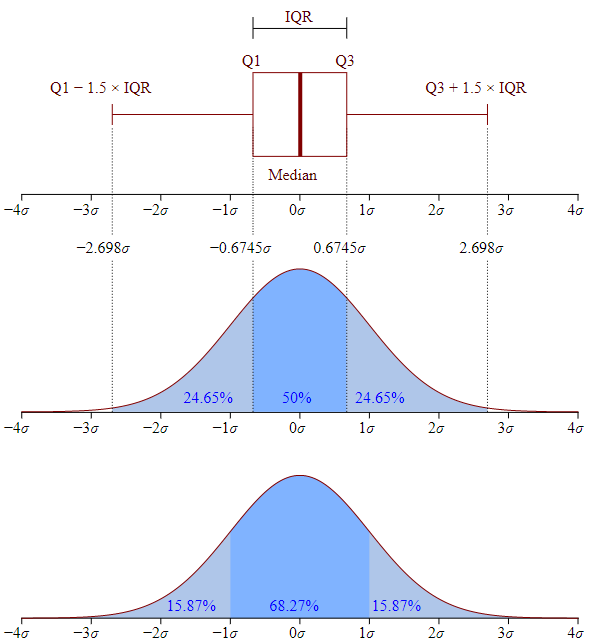

    Construct boxplots of the dataset, observe how the boxplots behave.
    If possible, try to create a point for the mean on the graph and
    compare it with the median constructed in the boxplot.

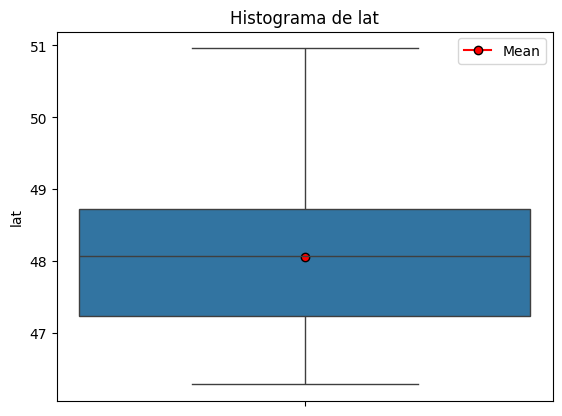

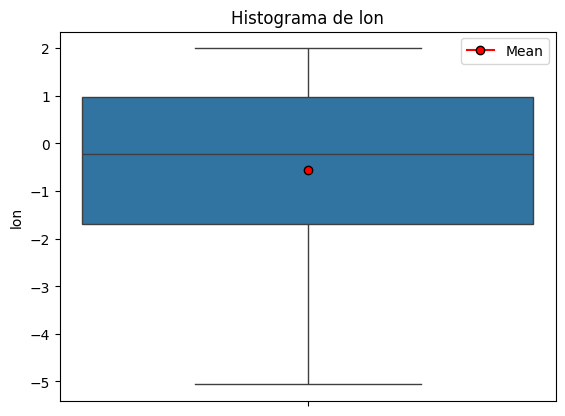

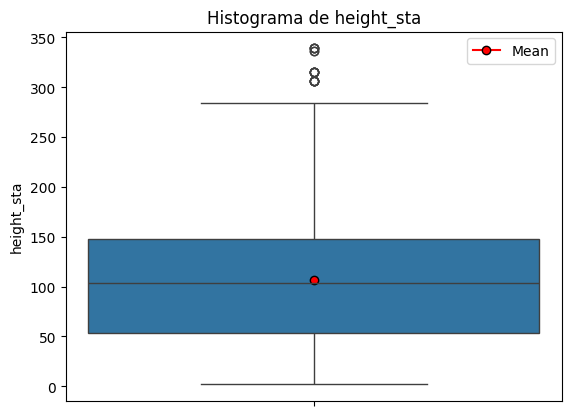

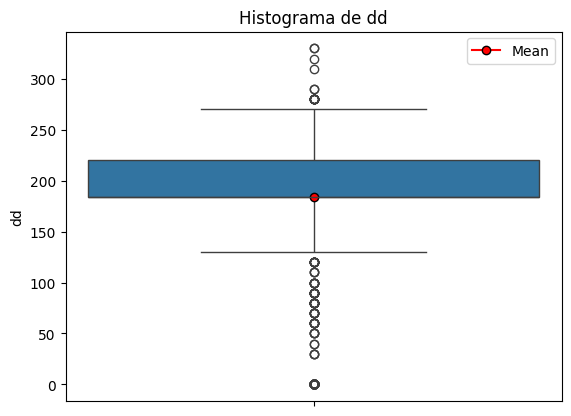

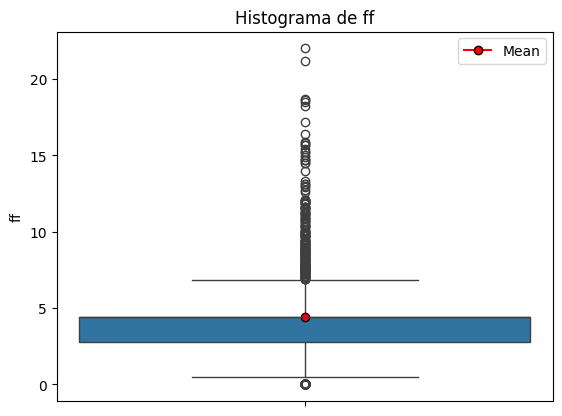

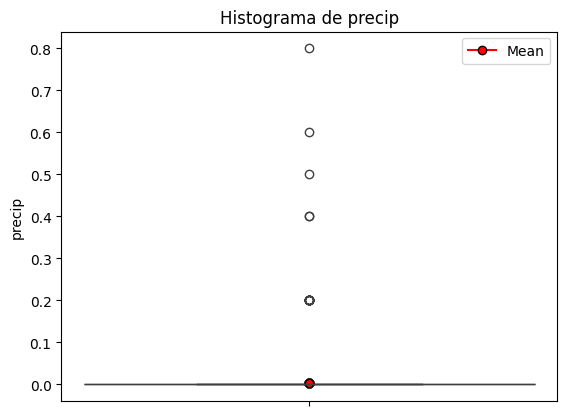

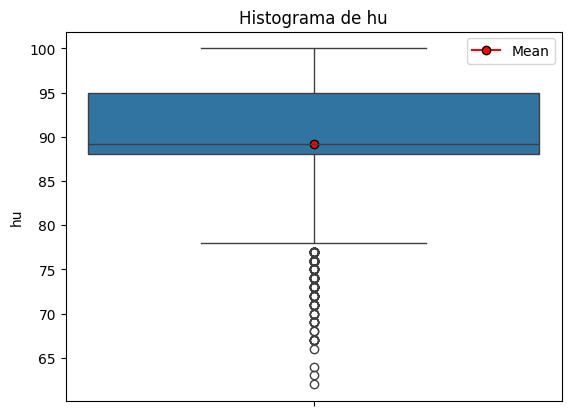

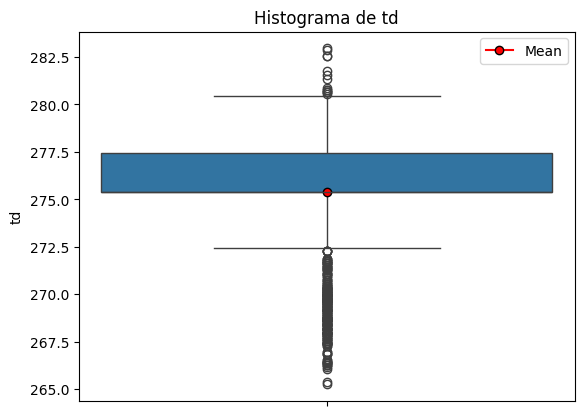

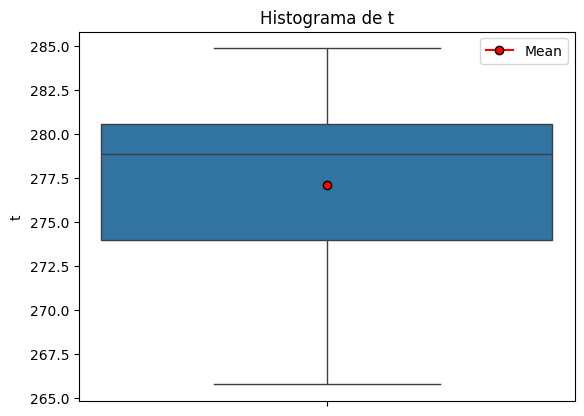

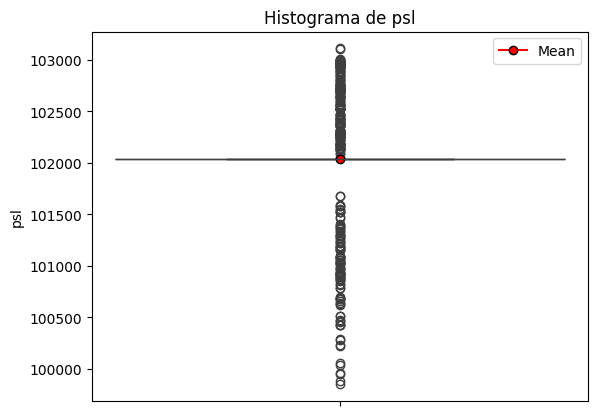

In [ ]:
for key in df.columns:
    if df[key].dtypes == 'float64':
      # Construct the histogram:
      sns.boxplot(data=df, y=key)

      # Calculate the mean of the column values:
      mean_value = df[key].mean()
      # Add the point representing the mean to the plot:
      plt.plot(mean_value, marker='o', markersize=6, markeredgecolor = 'black', color='red', label='Mean')

      # Grafic Elements:
      plt.title(f'Histograma de {key}')
      plt.legend()
      plt.show()

## Data typology:

    In computational scope, it's important that data be structured properly
    so that techniques, whatever their nature, including visualizations,
    can be applied without problems. Therefore, here we will address the
    data structure.

**object type:**

    The pandas library, in the absence of a suitable typology for
    the dat set, uses the "object" type to define this data, which
    we can simplify here as a sequence of characters, that is, a string.


**Treating tipology of the Date column**

    There are several ways to handle columns with datetime information.
    Since we want this variable to be defined with an appropriate type,
    let's start by transforming its type.

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d %H:%M');df

,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
0,14066001,49.330,-0.430,2.0,2016-01-01 00:00:00,210.000000,4.400000,0.0,91.000000,278.450000,279.850000,102034.934641
1,14126001,49.150,0.040,125.0,2016-01-01 00:00:00,183.774453,4.438347,0.0,99.000000,278.350000,278.450000,102034.934641
2,14137001,49.180,-0.460,67.0,2016-01-01 00:00:00,220.000000,0.600000,0.0,92.000000,276.450000,277.650000,102360.000000
3,14216001,48.930,-0.150,155.0,2016-01-01 00:00:00,220.000000,1.900000,0.0,95.000000,278.250000,278.950000,102034.934641
4,14296001,48.800,-1.030,339.0,2016-01-01 00:00:00,183.774453,4.438347,0.0,89.175719,275.388339,278.350000,102034.934641
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,95690001,49.108,1.831,126.0,2018-01-01 00:06:00,230.000000,9.400000,0.0,75.000000,276.650000,280.850000,102034.934641
1496,14066001,49.330,-0.430,2.0,2018-01-01 00:12:00,240.000000,8.100000,0.0,85.000000,277.050000,279.350000,102034.934641
1497,14126001,49.150,0.040,125.0,2018-01-01 00:12:00,183.774453,4.438347,0.0,89.175719,275.388339,277.086629,102034.934641
1498,14137001,49.180,-0.460,67.0,2018-01-01 00:12:00,270.000000,5.300000,0.0,87.000000,278.050000,280.050000,100680.000000


    There are some interesting principles to discuss when working
    with data. Here, I'm going to use a very useful concept in database
    construction, which is the process of data atomization. Therefore,
    I'll split the date column into two columns, "year" with the years
    and "hour" with the time information.

    What I'm doing is applying the first level of normalization (1NF),
    which has nothing to do with mathematical normalization, but rather
    a set of useful best practices to follow when dealing with data.

In [ ]:
# Handling data typology:
df['year'] = df['date'].dt.date # New column with year information
df['hour'] = df['date'].dt.time # New column with hour intomation
df = df.drop('date',axis=1) # Drop the old column with
df['year'] = pd.to_datetime(df['year'], format='%Y%m%d') # Column year to datatime

# Diplay de result:
display(df)

,number_sta,lat,lon,height_sta,dd,ff,precip,hu,td,t,psl,year,hour
0,14066001,49.330,-0.430,2.0,210.000000,4.400000,0.0,91.000000,278.450000,279.850000,102034.934641,2016-01-01,00:00:00
1,14126001,49.150,0.040,125.0,183.774453,4.438347,0.0,99.000000,278.350000,278.450000,102034.934641,2016-01-01,00:00:00
2,14137001,49.180,-0.460,67.0,220.000000,0.600000,0.0,92.000000,276.450000,277.650000,102360.000000,2016-01-01,00:00:00
3,14216001,48.930,-0.150,155.0,220.000000,1.900000,0.0,95.000000,278.250000,278.950000,102034.934641,2016-01-01,00:00:00
4,14296001,48.800,-1.030,339.0,183.774453,4.438347,0.0,89.175719,275.388339,278.350000,102034.934641,2016-01-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,95690001,49.108,1.831,126.0,230.000000,9.400000,0.0,75.000000,276.650000,280.850000,102034.934641,2018-01-01,00:06:00
1496,14066001,49.330,-0.430,2.0,240.000000,8.100000,0.0,85.000000,277.050000,279.350000,102034.934641,2018-01-01,00:12:00
1497,14126001,49.150,0.040,125.0,183.774453,4.438347,0.0,89.175719,275.388339,277.086629,102034.934641,2018-01-01,00:12:00
1498,14137001,49.180,-0.460,67.0,270.000000,5.300000,0.0,87.000000,278.050000,280.050000,100680.000000,2018-01-01,00:12:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   number_sta  1500 non-null   int64         
 1   lat         1500 non-null   float64       
 2   lon         1500 non-null   float64       
 3   height_sta  1500 non-null   float64       
 4   dd          1500 non-null   float64       
 5   ff          1500 non-null   float64       
 6   precip      1500 non-null   float64       
 7   hu          1500 non-null   float64       
 8   td          1500 non-null   float64       
 9   t           1500 non-null   float64       
 10  psl         1500 non-null   float64       
 11  year        1500 non-null   datetime64[ns]
 12  hour        1500 non-null   object        
dtypes: datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 152.5+ KB


# Visualization:

    Note that, although we have only just begun the "visualization" part,
    we have been working with visualization since the beginning of the
    activity. Consequently, we have been doing exploratory data analysis
    since the beginning of the activity as well. In practice, everything
    is interconnected.

    With that said, after completing the data preprocessing step, the
    visualization step is a crucial stage in the Exploratory Data Analysis
    (EDA) process. Humans operate in a highly visual manner, making this
    step pivotal.

    Here, we will introduce you to alternative solutions for graphical
    analysis. Although matplotlib is a classic solution, there are other
    tools that provide more aesthetically pleasing visualizations more
    easily or even perform tasks that matplotlib does not.

**Documentations:**

Plotly: https://plotly.com/python/

    Plotly, is an interactive, open-source, and browser-based graphing
    library. It offers Python-based charting, powered by plotly. js.
    The library ships with over 30 chart types, including scientific
    charts, 3D graphs, statistical charts, SVG maps, financial charts,
    and more.

Folium: https://python-visualization.github.io/folium/latest/getting_started.html

    Folium is a powerful Python library for georeferenced graphics that
    helps you create various types of leaflet maps. By default, Folium
    creates a map in a separate HTML file. Since Folium results are
    interactive, this library is very useful for building dashboards.
    You can also create Jupyter maps built into Folium.



In [ ]:
# describe os the data:
df.describe()

,number_sta,lat,lon,height_sta,dd,ff,precip,hu,td,t,psl,year
count,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500
mean,4.834153e+07,48.049943,-0.565041,106.581333,183.774453,4.438347,0.003879,89.175719,275.388339,277.086629,102034.934641,2016-12-31 16:00:00
min,1.406600e+07,46.280000,-5.060000,2.000000,0.000000,0.000000,0.000000,62.000000,265.250000,265.750000,99850.000000,2016-01-01 00:00:00
25%,2.916300e+07,47.230000,-1.690000,53.000000,183.774453,2.800000,0.000000,88.000000,275.388339,273.925000,102034.934641,2016-01-01 00:00:00
50%,4.410650e+07,48.070000,-0.230000,104.000000,183.774453,4.438347,0.000000,89.175719,275.388339,278.850000,102034.934641,2017-01-01 00:00:00
75%,6.254800e+07,48.726000,0.980000,148.000000,220.000000,4.438347,0.000000,95.000000,277.450000,280.550000,102034.934641,2018-01-01 00:00:00
max,9.569000e+07,50.960000,1.995000,339.000000,330.000000,22.000000,0.800000,100.000000,282.950000,284.850000,103110.000000,2018-01-01 00:00:00
std,2.198795e+07,1.011924,1.857875,69.040875,62.549886,2.886388,0.037506,7.479392,3.126651,4.645820,379.476351,NaN


In [ ]:
# More libraries for visualization:
## Plolty
import plotly.graph_objects as go
import plotly.express as px

## Folium
import folium
from folium.plugins import HeatMap

In [ ]:
#Tirando a média para ajudar na inicialização:
media_latitude = df['lat'].mean()
media_longitude = df['lon'].mean()

fmap = folium.Map(location = [media_latitude,media_longitude], zoom_start = 6.5,title = 'cartodbpositron')
heat_map = HeatMap(df[['lat','lon']])
fmap.add_child(heat_map)
display(fmap)

**REMARKE**

    If you didn't know, or just to refresh your memory, there are two types
    of data: continuous and discrete. There are appropriate visualizations
    for each type of data. Generally, not adhering to this principle often
    results in poor visualizations.
  
Great,  some chart types are...

For $continuos$ variable ($X \subset \mathbb{R}$):

1. **Histogram:** This chart shows the distribution of a continuous variable divided into intervals. Each bar represents the frequency or density of observations within a specific interval.

2. **Boxplot:** This graph displays the distribution of a continuous variable through quartiles. It provides a quick view of the median, quartiles, and outlier detection.

3. **Scatter Plot:** Useful for visualizing the relationship between two continuous variables. Each point on the plot represents an observation, and the position on the x and y axes corresponds to the values of the two variables.

4. **Line Plot:** Can be used to show temporal trends or relationships between continuous variables over a continuous range, such as time.

For $discrete$ variable ($X \subset \mathbb{N}^*$):

1. **Bar Chart:** Useful for showing the distribution of a discrete variable. Each bar represents the frequency or proportion of observations in each category.

2. **Pie Chart:** Shows the proportion of each category relative to the total. It's most useful when comparing the share of each category in the total.

3. **Pareto Chart:** A special version of the bar chart where bars are arranged in descending order of frequency, highlighting the most important categories.

4. **Funnel Chart:** Useful for showing steps in a process or conversion between different discrete categories.


    These are just a few; you can use others if you want, as long as the
    chart is built to accommodate the variables you are trying to analyze.


In [ ]:
# To remarke the data types:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   number_sta  1500 non-null   int64         
 1   lat         1500 non-null   float64       
 2   lon         1500 non-null   float64       
 3   height_sta  1500 non-null   float64       
 4   dd          1500 non-null   float64       
 5   ff          1500 non-null   float64       
 6   precip      1500 non-null   float64       
 7   hu          1500 non-null   float64       
 8   td          1500 non-null   float64       
 9   t           1500 non-null   float64       
 10  psl         1500 non-null   float64       
 11  year        1500 non-null   datetime64[ns]
 12  hour        1500 non-null   object        
dtypes: datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 152.5+ KB


    One thing we could think about here is the distribution of station
    heights, which would be an interesting piece of information. Plot
    a graph aimed at understanding the distribution of the data using
    the Plotly library.

In [ ]:
# Create the plot:
fig = go.Figure(data=[go.Histogram(x=df['height_sta'])])

# Config of the Plot:
fig.update_layout(title='Histogram height_sta',
                  xaxis_title='height_sta',
                  yaxis_title='Frequency')

# Exhibition:
fig.show()

    Another interesting piece of information would be to compare wind
    direction with wind speed. Create an appropriate graph for this
    type of analysis.

In [ ]:
# Create the scatter plot:
fig = px.scatter(df, x="dd", y="ff", color="t", title="wind direction x wind speed")
fig.show()

    Or we can analyze a set of variables all at once. Construct
    a visualization to analyze multiple variables at once.

**Note:**

    You don't need to create nested charts; there are types of charts
    that are already groupings of variables. Look for a solution among
    those to ease your work.

In [ ]:
# Constructing the vector with the appropriate variables
dimensions=[key for key in df.columns if df[key].dtypes == 'float64' and key != 'lat' and key != 'lon']

# Create the plot:
fig = px.scatter_matrix(df, dimensions=dimensions, color="number_sta")
fig.show()